Project 3 is created to see whether a different approach in data cleaning works better in the end for the ML algorithm, XGBoost.

Steps: 
1. Download data set
2. Make ID column the name of the rows
3. Delete columns where NaN data is present in more than half of the rows
4. Apply Ordinal Encoding to deal with categorical data
5. Apply KNN imputation to deal with remaining rows where NaN data is still present
6. Calculate MI scores
7. Create new features
8. Delete columns that make up the new features
9. Delete columns with least MI scores
10. Split the data into training and validation sets
11. Apply scaling
12. Apply XGBoost algorithm
13. Apply GridSearch algorithm to tune the hyperparameters

In [23]:
import pandas as pd
train_set = "/Users/serraus/Desktop/house-prices-advanced-regression-techniques/train.csv"
trainn_data = pd.read_csv(train_set)

In [24]:
trainn_data.set_index("Id", inplace=True)

In [25]:
trainn_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
trainn_data.drop(['Alley', 'MasVnrType', 'Fence', 'PoolQC'], axis = 1, inplace= True)
print(trainn_data)

In [ ]:
from function_sheet import category_calculator
for column in trainn_data.columns:
    print("Column:", column)
    category_calculator(trainn_data[column])
    print("-" * 50)

In [ ]:
from function_sheet import ordinal_encoder
encoded_trainn_data = ordinal_encoder(trainn_data)
print(encoded_trainn_data)

In [ ]:
from function_sheet import imputer
imputed_trainn_data = imputer(encoded_trainn_data)
print(imputed_trainn_data)

In [12]:
from function_sheet import mi_scores
x = imputed_trainn_data
y = imputed_trainn_data["SalePrice"]
mi = mi_scores(x, y)
mi.head(10)

SalePrice       5.585131
MiscFeature     0.760556
FireplaceQu     0.576683
OverallQual     0.576350
Neighborhood    0.512732
GrLivArea       0.483863
YearBuilt       0.371146
TotalBsmtSF     0.367192
GarageCars      0.366340
GarageArea      0.362888
dtype: float64

In [9]:
from function_sheet import new_features
new_training_data_features = new_features(imputed_trainn_data)
print(new_training_data_features)

      AgeHouse  TotalSF  HasPool
0          5.0   2566.0        0
1         31.0   2524.0        0
2          7.0   2706.0        0
3         91.0   2473.0        0
4          8.0   3343.0        0
...        ...      ...      ...
1455       8.0   2600.0        0
1456      32.0   3615.0        0
1457      69.0   3492.0        0
1458      60.0   2156.0        0
1459      43.0   2512.0        0

[1460 rows x 3 columns]


In [ ]:
imputed_trainn_data.drop(['YrSold', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'PoolArea'], axis = 1, inplace = True)
print(imputed_trainn_data)

In [16]:
new_mi = mi_scores(x, y)
new_mi.head(20)

SalePrice       5.576915
MiscFeature     0.757663
TotalSF         0.677362
FireplaceQu     0.574712
OverallQual     0.561081
Neighborhood    0.509944
GrLivArea       0.484220
GarageArea      0.363773
GarageCars      0.362115
BsmtQual        0.342121
AgeHouse        0.336283
KitchenQual     0.332813
ExterQual       0.315364
GarageYrBlt     0.298041
MSSubClass      0.279888
FullBath        0.261243
GarageFinish    0.252476
YearRemodAdd    0.250073
GarageType      0.230289
TotRmsAbvGrd    0.218583
dtype: float64

In [21]:
new_mi.tail(15)

ExterCond       0.009741
ScreenPorch     0.009555
RoofStyle       0.008706
Heating         0.007959
BsmtFinSF2      0.007757
LowQualFinSF    0.006818
BsmtFinType2    0.004662
BsmtHalfBath    0.000000
Condition2      0.000000
Functional      0.000000
3SsnPorch       0.000000
RoofMatl        0.000000
MiscVal         0.000000
MoSold          0.000000
Utilities       0.000000
dtype: float64

In [ ]:
columns_to_be_removed = [
    'RoofStyle',
    'BsmtHalfBath',
    'RoofMatl',
    'LowQualFinSF',
    'BsmtFinSF2',
    'Utilities',
    '3SsnPorch',
    'MoSold',
    'Condition2', 
    'ExterCond', 
    'ScreenPorch',
    'Heating',
    'BsmtFinType2',
    'Functional',
    'MiscVal'

]
imputed_trainn_data.drop(columns=columns_to_be_removed, inplace=True) #inplace = True modifies the original DataFrame
print(imputed_trainn_data)

In [ ]:
X_3 = imputed_trainn_data.drop("SalePrice", axis = 1)
y_3 = imputed_trainn_data.SalePrice
print(X_3, y_3)

In [14]:
#Splitting the data into train/validation sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_3, y_3, test_size=0.2, random_state=42) 
#test size means that the data will be splitted as 80% training 20% validation set
#setting random state into a fixed number ensures the same result is obtained when the code is run again


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)


In [17]:
#XGBoost 
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

XGBRegressor().fit(x_train, y_train)
model = XGBRegressor(
    n_estimators=300, #number of trees that the model builds, it should be not too high not too low
    learning_rate=0.01, #step-size, used to prevent overfitting, it should be not too lare not too low
    max_depth=5, #maximum depth of a tree
    subsample=0.7, #fraction of samples used for training each tree
    )
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
score = mean_absolute_error(y_valid, y_pred)
score2 = r2_score(y_valid, y_pred)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 16852.189332726884
R^2 score: 0.8922707339079821


In [88]:
from sklearn.model_selection import GridSearchCV

hyperparameter_grid = {
    'n_estimators' : [50, 100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'max_depth' : [5,7,9],
    'subsample' : [0.4,0.6,0.8,1.0]
}
model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=hyperparameter_grid, cv=5, scoring='neg_mean_absolute_error')
#negative MAE is used because the algorithm is trying to minimize the error
#cv stands for cross validation - which is a technique were data is split into smaller subsets and each of them is tried along the training. 

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_


In [89]:
print(best_params)
print(best_xgb_model)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [18]:
XGBRegressor().fit(x_train, y_train)
model = XGBRegressor(
    n_estimators=200, #number of trees that the model builds, it should be not too high not too low
    learning_rate=0.1, #step-size, used to prevent overfitting, it should be not too lare not too low
    max_depth=5, #maximum depth of a tree
    subsample=0.6, #fraction of samples used for training each tree
    )
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
score = mean_absolute_error(y_valid, y_pred)
score2 = r2_score(y_valid, y_pred)
print("Mean Absolute Error:", score)
print("R^2 score:", score2)

Mean Absolute Error: 13715.915065817637
R^2 score: 0.9191487867244753


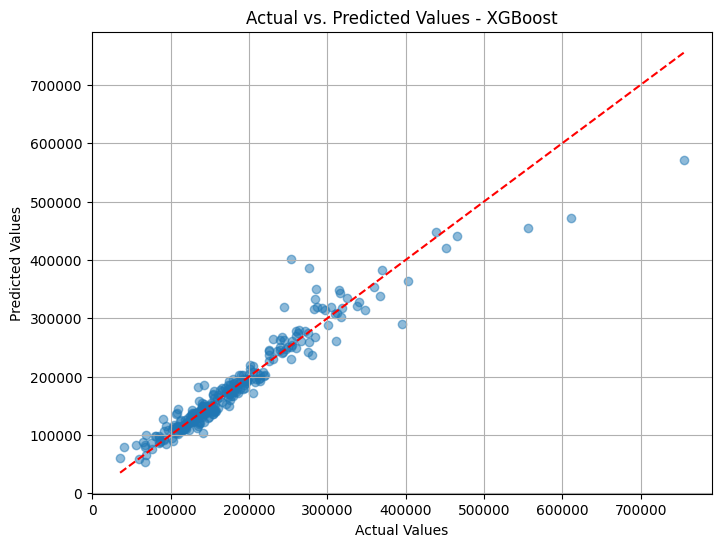

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred, alpha=0.5)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], linestyle='--', color='r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - XGBoost")
plt.grid(True)
plt.show()

Result of project 3 was better than project 2 however still lower than the original project. 